In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from VLC_init import *


"""
*: coordinate center of cari

|--------|                     
| car1   |                      
|-------*|
         |
       y |                   |---------|
         |                   |  car2   |
         |-------------------|*--------|
                    d

"""

vlc_obj = VLC_init()
vlc_obj.update_lookuptable()
print(vlc_obj.H)
dt = 5e-9
t = np.arange(0, 1e-2, dt)
noise = np.random.normal(0, 1e-1, np.size(t))
delay1 = vlc_obj.delays[0][1]
delay2 = vlc_obj.delays[1][1] 
f = 4e6
r = 3999
N = 1
fclk = 1/(2*dt)
l = 1

[[0 0]
 [0 0]]


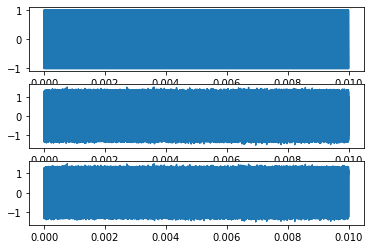

In [2]:
s_e = signal.square(2 * np.pi * f * t) + noise
s_r = signal.square(2 * np.pi * f * (t + delay1)) + noise
s_h = signal.square(2 * np.pi * f * (r/(r+1)) * t)

s_gate = (signal.square(2 * np.pi * (f / (N * (r+1))) *t) > 0)
s_clk  = np.zeros(np.size(t))
s_clk[np.arange(1, np.size(s_clk), 2)] = 1

s_eh = np.zeros(np.size(t))
s_rh = np.zeros(np.size(t))
s_phi = np.zeros(np.size(t))
s_phi_h = np.zeros(np.size(t))
s_phi_hh = np.zeros(np.size(t))

s_eh_state = 0
s_rh_state = 0

count = []
M = 0

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, s_h)
plt.subplot(3, 1, 2)
plt.plot(t, s_e)
plt.subplot(3, 1, 3)
plt.plot(t, s_r)

In [3]:
for i in range(1, np.size(t)):
    
    if(s_h[i] - s_h[i-1] == 2):
        
        if(s_e[i] > 0):
            s_eh_state = 1
        else:
            s_eh_state = 0

        if(s_r[i]>0):
            s_rh_state = 1
        else:
            s_rh_state = 0
            
    s_eh[i] = s_eh_state
    s_rh[i] = s_rh_state
    
    s_phi[i] = np.logical_xor(s_eh_state, s_rh_state)
    
    s_phi_h[i] = s_phi[i] * s_gate[i]
    s_phi_hh[i] = s_phi_h[i] * s_clk[i]
    
    if(s_gate[i] == 1):
        if(s_phi_hh[i] == 1):
            M += 1
        update_flag = 1
    else:
        if(update_flag == 1):
            count.append(M)
            M = 0
            update_flag = 0

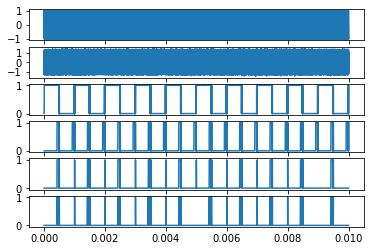

In [4]:
plt.figure()
plt.subplot(6, 1, 1)
plt.plot(t, s_h)
plt.subplot(6, 1, 2)
plt.plot(t, s_e)
plt.subplot(6, 1, 3)
plt.plot(t, s_eh)
plt.subplot(6, 1, 4)
plt.plot(t, s_phi)
plt.subplot(6, 1, 5)
plt.plot(t, s_phi_h)
plt.subplot(6, 1, 6)
plt.plot(t, s_phi_hh)

In [5]:
d_m = (vlc_obj.c/2) * (np.max(count) / ((r+1) * N * fclk)) # around the half of the original value.
print(d_m)
print(vlc_obj.distances[0][1])

2.7003749999999997
5.0990195135927845


In [6]:
dr = vlc_obj.distances[0][1]
print(dr)
dl = vlc_obj.distances[1][1]
print(dl)

5.0990195135927845
5.385164807134504


In [7]:
y = (dl**2 - dr**2 + 1**2) / (2*l)
print(y)
x = np.sqrt(dl**2 - y**2)
print(x)

2.0
5.0


In [8]:
print("Coords: ")
print("(", -x,  ", ", y, ")")
print("(", -x,  ", ", y+1, ")")

Coords: 
( -5.0 ,  2.0 )
( -5.0 ,  3.0 )
